# Diagnosing a Machine Learning Algorithm

## First we generate the dataset

Here we generate a dataset with 20 features, only 2 of which are informative.  This makes it easy to overfit!

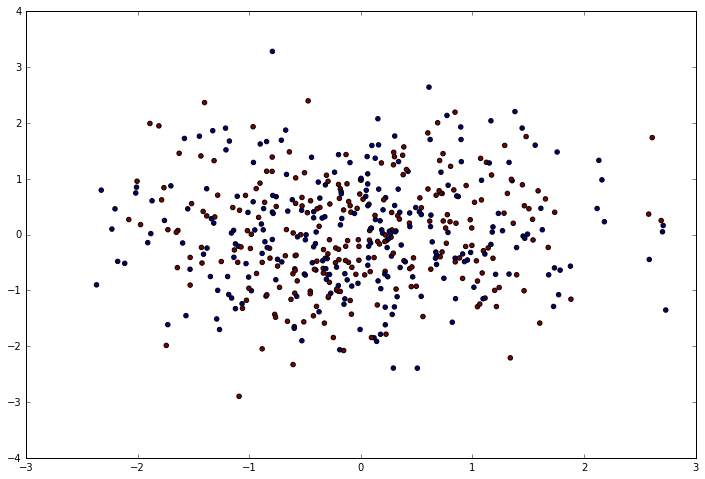

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

fig, ax = plt.subplots(figsize=(12,8))
Nsamples = 500
X1, Y1 = make_classification(n_samples = Nsamples, n_features=20, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, random_state=7)
ax.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

## Start by scaling the features

In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X1)
#print("Means = {0}, Stdevs = {1}".format(scaler.mean_, scaler.scale_))
X1 = scaler.transform(X1)

## Split off a test set

In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=4)

# Play around manually

In [ ]:
from sklearn.linear_model import LogisticRegression
C=1000.
LR = LogisticRegression(C=C)
LR.fit(X_train, y_train)
y_train_pred = LR.predict_proba(X_train)
y_test_pred = LR.predict_proba(X_test)
from sklearn.metrics import log_loss
print("Train score = {0}".format(log_loss(y_train, y_train_pred)))
print("Test score = {0}".format(log_loss(y_test, y_test_pred)))

## Adding Cross validation

In [ ]:
from sklearn.cross_validation import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(y_train, test_size=0.1, random_state=42)
scores = cross_val_score(LogisticRegression(C=1.e-3), X_train, y_train, scoring="log_loss", cv=cv)
-scores

# Training vs CV scores

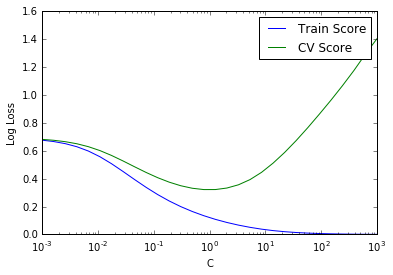

In [12]:
from sklearn.learning_curve import validation_curve
import numpy as np
C = np.logspace(-3,3,30)
train_scores, cv_scores = validation_curve(LogisticRegression(), X_train, y_train, "C", np.logspace(-3,3,30), scoring="log_loss", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
cv_scores_mean = np.mean(cv_scores, axis=1)
fig,ax = plt.subplots()
ax.semilogx(C, np.abs(train_scores_mean), label='Train Score')
ax.semilogx(C, np.abs(cv_scores_mean), label='CV Score')
ax.set_xlabel("C")
ax.set_ylabel("Log Loss")
ax.legend()

# Plotting learning curves

In [13]:
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, scoring="log_loss", train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, scoring=scoring, train_sizes=train_sizes)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/dtamayo/miniconda2/envs/p2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

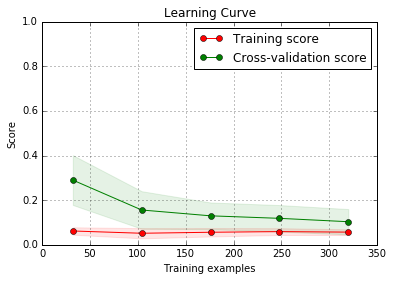

In [18]:
C=2.
cv = StratifiedShuffleSplit(y_train, test_size=0.2, random_state=42)
plot_learning_curve(LogisticRegression(C=C), "Learning Curve", X_train, y_train, cv=cv, ylim=(0., 1), n_jobs=-1, scoring="log_loss")